# Continuous Control

---
You can train the agent and then test it, or just test the pre-trained model. If so, jump to step 5.

# TRAINING

### 1. Start the Environment
We begin by importing the necessary packages. If the code cell below returns an error, please check that you have installed Unity ML-Agents and NumPy.

In [ ]:
from unityagents import UnityEnvironment
import numpy as np


Let's start the environment!


### 2. Examine the State and Action Spaces

In this environment, 20 double-jointed arms/agents can move to target locations. For each agent, a reward of +0.1 is provided for each step that the agent's hand is in the goal location. Thus, the goal of the agents is to maintain its position at the target location for as many time steps as possible.

For the single agent, the observation space consists of 33 variables corresponding to position, rotation, velocity, and angular velocities of the arm. Each action is a vector with four numbers, corresponding to torque applicable to two joints. Every entry in the action vector is expected to be a number between -1 and 1.

Run the code cell below to print more details.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which animate the environment. Our brain of interest is the first one. Let's pick it!

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Train the agents

Let's train the agent.
The training will stop if desired score or n_episodes (max) is reached. Each episode can last at most max_t steps.

In [5]:
from cc_ddpg_agent import Agents
from collections import deque
import torch

n_episodes=200
max_t=1000
desired_score=30

agents = Agents(num_agents, state_size, action_size, 4109)

scores = []                        # list containing scores from each episode
scores_window = deque(maxlen=100)  # last 100 scores
score = 0

for i_episode in range(1, n_episodes+1): 

    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    score = np.zeros(num_agents)                           # initialize the score (for each agent)

    for t in range(max_t):
        actions     = agents.act(states)                   # select an action (for each agent)
        env_info    = env.step(actions)[brain_name]        # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards     = env_info.rewards                     # get reward (for each agent)
        dones       = env_info.local_done                  # see if episode finished

        agents.step(states, actions, rewards, next_states, dones)
        
        states = next_states                               # roll over states to next time step
        score += env_info.rewards                          # update the score (for each agent)
        
        if np.any(dones):                                  # exit loop if episode finished
            break
     
    episode_score = np.mean(score)            # score averaged over agents    
    scores_window.append(episode_score)       # save most recent episode score
    scores.append(episode_score)              # save most recent episode score
    print('\rEpisode {}\tAverage Score (over agents): {:.2f}'.format(i_episode, episode_score), end="")

    if i_episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    if np.mean(scores_window)>=desired_score:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
        torch<.save(agents.actor_local.state_dict(),   'checkpoint.pth')
        torch.save(agents.actor_target.state_dict(),  'backup_actor_target.pth')
        torch.save(agents.critic_local.state_dict(),  'backup_critic_local.pth')
        torch.save(agents.critic_target.state_dict(), 'backup_critic_target.pth')
        break


Episode 130	Average Score (over agents): 34.55
Environment solved in 30 episodes!	Average Score: 30.28


When finished, you can close the environment.

In [6]:
env.close()

### 4. Was training successful?
If training was successful, the desired score has been achieved.
Let's see how: episode by episode (on average).  
If training failed, run it again (you could also play with parameters before).

In [ ]:
# Install necessary packages...
!pip3 install box2d

import matplotlib.pyplot as plt
%matplotlib inline

!python -m pip install pyvirtualdisplay
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

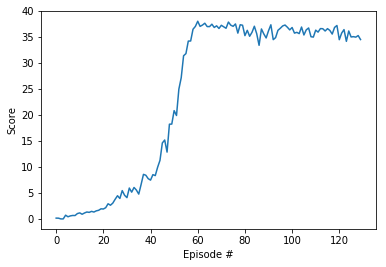

In [8]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# TESTING
### 5. Agent in action!
Let's see how the trained agents play!
We'll load the previously trained model: checkpoint.pth .

Note: this step can be run apart from the previous TRAINING steps; the file contains a pre-trained model.


In [ ]:
from unityagents import UnityEnvironment
import numpy as np

# version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='Reacher_Windows_x86_64\Reacher.exe')

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

In [ ]:
from cc_ddpg_agent import Agents
import torch 

agents = Agents(num_agents, state_size, action_size, 4109)
agents.load_to_cpu(path='checkpoint.pth')

In [ ]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
score = np.zeros(num_agents)                           # initialize the score (for each agent)

max_t = 1000
for t in range(max_t):
    actions     = agents.act(states)                   # select an action (for each agent)
    env_info    = env.step(actions)[brain_name]        # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards     = env_info.rewards                     # get reward (for each agent)
    dones       = env_info.local_done                  # see if episode finished
    states = next_states                               # roll over states to next time step
    score += env_info.rewards                          # update the score (for each agent)

    if np.any(dones):                                  # exit loop if episode finished
        break

episode_score = np.mean(score)                         # score averaged over agents    
print('\rEpisode  Score (over agents): {:.2f}'.format(episode_score), end="")
